In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from pandas import DataFrame
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer



df = pd.read_csv('D:\post.csv', encoding = 'utf16')
d=df['review']
d.head()

0    ታዛዥ ነን !!የምንችለውን ሁሉ ለማደረግ። እግዚአብሔር ብቻ ከናንተ ጋር ይሁን
1    ያልከው ሁሉ ያልከው ልክ ነይ በአላህ እገዛ ሁሉም ለሀገራችን ጥሩን እመኛለሁ።
2        የዘመኑ ጀግና እና ማዕበሉን የምታሻግር የድርሻውን የሚወጣ አንበሳ ነህ።
3                  ድል ከእውነተኛው ተባዳዮች ጋር ናት ጀግናዬ ነህ ዐቢቹ።
4          ፈጣሪ ይርዳን በተለይ እንደ አማራ ህዝብ በጣም አሳሳቢ እየሆነ ነው 
Name: review, dtype: object

In [2]:
class normalize(object):
    expansion_file_dir='' # assume you have file with list of short forms with their expansion as gazeter
    short_form_dict={}
    # Constructor
    def __init__(self):
       self.short_form_dict=self.get_short_forms()
        

    def get_short_forms(self):
         text=open(self.expansion_file_dir,encoding='utf8')
         exp={}
         for line in iter(text):
            line=line.strip()
            if not line:  # line is blank
                continue
            else:
                expanded=line.split("-")
                exp[expanded[0].strip()]=expanded[1].replace(" ",'_').strip()
         return exp
                     

    # method that expand short form file
    def expand_short_form(input_short_word):
        if input_short_word in self.short_form_dict:              
            return self.short_form_dict[input_short_word]
        else:
            return input_short_word

def preprocess(input_token):
 space_pattern = '\s+'
 url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
 '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
 englishword_num ='[a-zA-Z]|[0-9]+'
 AmhPunc='[፤።፡፣:,.?/()•“”*፨]+'
 special_char = "[@#$%^&=?×!,;:_.(){}`'/+*<>\"¤— „\ ®¯™¡¡\x10»€«·‘0e1b§”¬¦…""f÷\~¨©±¥£¶–°•˜’“|]"
 geez_number=' [፩ ፪ ፫ ፬ ፭ ፮ ፯ ፰ ፱ ፲ ፳ ፴ ፵ ፶ ፷ ፸ ፹ ፺ ፻] ' # for removing geez number
 RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
 Clean_text = re.sub(url_regex,'', input_token)
 Clean_text = re.sub(AmhPunc,' ',Clean_text)
 Clean_text=re.sub(special_char,' ',Clean_text)
 Clean_text= re.sub(englishword_num,'',Clean_text)
 Clean_text= re.sub(r'(.)\1+', r'\1\1',Clean_text) #removing elongation in text
 Clean_text = RE_EMOJI.sub(r'', Clean_text)
 Clean_text =re.sub(geez_number,'',Clean_text)
 Clean_text=re.sub('-','',Clean_text)
 Clean_text=re.sub(r'<[^>]*>','', Clean_text)
 Clean_text=re.sub('-',' ',Clean_text)
 Clean_text = Clean_text.replace("\\", "");
 Clean_text = Clean_text.replace("[", "");
 Clean_text = Clean_text.replace("]", "");
 Clean_text = re.sub(space_pattern,' ',Clean_text)
 return Clean_text
def normalize_char_level_missmatch(input_token):
        rep1=re.sub('[ሃኅኃሐሓኻ]','ሀ',input_token)
        rep2=re.sub('[ሑኁዅ]','ሁ',rep1)
        rep3=re.sub('[ኂሒኺ]','ሂ',rep2)
        rep4=re.sub('[ኌሔዄ]','ሄ',rep3)
        rep5=re.sub('[ሕኅ]','ህ',rep4)
        rep6=re.sub('[ኆሖኾ]','ሆ',rep5)
        rep7=re.sub('[ሠ]','ሰ',rep6)
        rep8=re.sub('[ሡ]','ሱ',rep7)
        rep9=re.sub('[ሢ]','ሲ',rep8)
        rep10=re.sub('[ሣ]','ሳ',rep9)
        rep11=re.sub('[ሤ]','ሴ',rep10)
        rep12=re.sub('[ሥ]','ስ',rep11)
        rep13=re.sub('[ሦ]','ሶ',rep12)
        rep14=re.sub('[ዓኣዐ]','አ',rep13)
        rep15=re.sub('[ዑ]','ኡ',rep14)
        rep16=re.sub('[ዒ]','ኢ',rep15)
        rep17=re.sub('[ዔ]','ኤ',rep16)
        rep18=re.sub('[ዕ]','እ',rep17)
        rep19=re.sub('[ዖ]','ኦ',rep18)
        rep20=re.sub('[ጸ]','ፀ',rep19)
        rep21=re.sub('[ጹ]','ፁ',rep20)
        rep22=re.sub('[ጺ]','ፂ',rep21)
        rep23=re.sub('[ጻ]','ፃ',rep22)
        rep24=re.sub('[ጼ]','ፄ',rep23)
        rep25=re.sub('[ጽ]','ፅ',rep24)
        rep26=re.sub('[ጾ]','ፆ',rep25)
        #Normalizing words with Labialized Amharic characters such as በልቱዋል or  በልቱአል to  በልቷል  
        rep27=re.sub('(ሉ[ዋአ])','ሏ',rep26)
        rep28=re.sub('(ሙ[ዋአ])','ሟ',rep27)
        rep29=re.sub('(ቱ[ዋአ])','ቷ',rep28)
        rep30=re.sub('(ሩ[ዋአ])','ሯ',rep29)
        rep31=re.sub('(ሱ[ዋአ])','ሷ',rep30)
        rep32=re.sub('(ሹ[ዋአ])','ሿ',rep31)
        rep33=re.sub('(ቁ[ዋአ])','ቋ',rep32)
        rep34=re.sub('(ቡ[ዋአ])','ቧ',rep33)
        rep35=re.sub('(ቹ[ዋአ])','ቿ',rep34)
        rep36=re.sub('(ሁ[ዋአ])','ኋ',rep35)
        rep37=re.sub('(ኑ[ዋአ])','ኗ',rep36)
        rep38=re.sub('(ኙ[ዋአ])','ኟ',rep37)
        rep39=re.sub('(ኩ[ዋአ])','ኳ',rep38)
        rep40=re.sub('(ዙ[ዋአ])','ዟ',rep39)
        rep41=re.sub('(ጉ[ዋአ])','ጓ',rep40)
        rep42=re.sub('(ደ[ዋአ])','ዷ',rep41)
        rep43=re.sub('(ጡ[ዋአ])','ጧ',rep42)
        rep44=re.sub('(ጩ[ዋአ])','ጯ',rep43)
        rep45=re.sub('(ጹ[ዋአ])','ጿ',rep44)
        rep46=re.sub('(ፉ[ዋአ])','ፏ',rep45)
        rep47=re.sub('[ቊ]','ቁ',rep46) #ቁ can be written as ቊ
        rep48=re.sub('[ኵ]','ኩ',rep47) #ኩ can be also written as ኵ  
        return rep48
def stem(word):

    s = pd.readtxt("D:/sufix.txt", 'r', encoding='utf-8')
    su = s.read()
    p = pd.read_txt ("D:/prefix.txt", 'r', encoding='utf-8')
    pr = p.read()
    stemmed=[]
    for suf in su.split():
        if len(word) > 2:
            if word.endswith(suf):
                word = word[:-len(suf)]
    for pre in pr.split():
        if len(word) > 2:
            if word.startswith(pre):
                l = len(pre)
                word = word[l:]
    #word = normal(word)
    print("stemmed word ",stemmed)
    return word

df['nreview'] = d.apply(preprocess)
#df['nreview'] =df['nreview'].apply(normalize_char_level_missmatch)

X = []
sentences = list(df['nreview'] )
for sen in sentences:
    #print(sen)
    X.append(normalize_char_level_missmatch(sen))
y = df['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

tokenizer = Tokenizer(num_words=5000)


tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
#print(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 20

#print(tokenizer)

In [4]:
X_train = pad_sequences(X_train, padding='pre', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='pre', maxlen=maxlen)
from numpy import array
from numpy import asarray
from numpy import zeros


embeddings_dictionary = dict()
glove_file = open('D:/word2vec.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()
# print(embeddings_dictionary)
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
#     print(word, index)
    embedding_vector = embeddings_dictionary.get(word)
#     print(embedding_vector)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
#print(embedding_matrix)  


In [5]:
from keras.metrics import Precision, Recall
from keras.models import Model
from tensorflow.keras.models import Sequential
from keras.layers import Dense,GRU,LSTM,Embedding
from tensorflow.keras.optimizers import Adam
#from keras.optimizers import Adam
from keras.layers import SpatialDropout1D,Dropout,Bidirectional,Conv1D,GlobalMaxPooling1D,MaxPooling1D,Flatten
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping
max_features = vocab_size
max_words = 20
batch_size = 128
epochs = 5
num_classes=1
#model2_GRU = Sequential()

model2_GRU=Sequential()
#model2_GRU.add(Embedding(vocab_size, 100, input_length=maxlen))
model2_GRU.add(Embedding(max_features,100,mask_zero=True))
model2_GRU.add(GRU(64,dropout=0.5,return_sequences=True))
#model2_GRU.add(Dense(32))
model2_GRU.add(GRU(32,dropout=0.5,return_sequences=False))
model2_GRU.add(Dense(num_classes,activation='sigmoid'))
model2_GRU.compile(loss='binary_crossentropy',optimizer=Adam(lr = 0.001),metrics=['accuracy', Precision(), Recall()])
history =model2_GRU.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.10)
print(model2_GRU.summary())
score = model2_GRU.evaluate(X_test, y_test, verbose=1)

print("Test Loss:", score[0])
print("Test Accuracy:", score[1])
print("Test Precision:", score[2])
print("Test Recall:", score[3])

C:\Users\Fiker\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/5
32/32 [==============================] - 23s 175ms/step - loss: 0.6571 - accuracy: 0.6737 - precision: 0.5550 - recall: 0.8253 - val_loss: 0.4915 - val_accuracy: 0.8889 - val_precision: 0.6522 - val_recall: 0.8055
Epoch 2/5
32/32 [==============================] - 2s 63ms/step - loss: 0.2861 - accuracy: 0.9005 - precision: 0.7183 - recall: 0.8304 - val_loss: 0.2352 - val_accuracy: 0.9200 - val_precision: 0.7673 - val_recall: 0.8497
Epoch 3/5
32/32 [==============================] - 2s 64ms/step - loss: 0.1517 - accuracy: 0.9452 - precision: 0.7994 - recall: 0.8663 - val_loss: 0.2221 - val_accuracy: 0.9244 - val_precision: 0.8234 - val_recall: 0.8795
Epoch 4/5
32/32 [==============================] - 2s 62ms/step - loss: 0.0941 - accuracy: 0.9681 - precision: 0.8422 - recall: 0.8916 - val_loss: 0.2363 - val_accuracy: 0.9289 - val_precision: 0.8571 - val_recall: 0.9007
Epoch 5/5
32/32 [==============================] - 2s 63ms/step - loss: 0.0673 - accuracy: 0.9778 - precision:

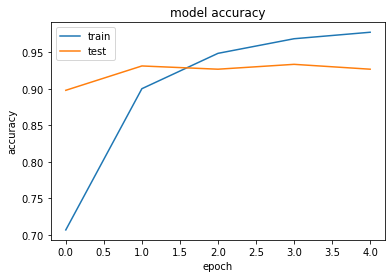

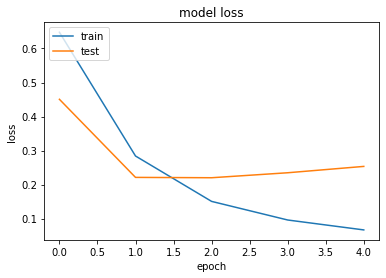

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
model.add(embedding_layer)
model.add(Dropout(0.2))
model.add(Conv1D(128, 10, activation='relu'))
model.add(GlobalMaxPooling1D())
#model.add(Dense(1)
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

history = model.fit(X_train, y_train, batch_size=128, epochs=3, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=2)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])